# CAVIAR Investigation Case Study

## What are we trying to find?
- Understand about the criminal network with data gathered in 7 different datasets with investigation spanning 2 years.
- Who are the most important personnel to break the chain.
- Understand the importance of these people along the timeline of 2 Years, who became important, who became less important, who stepped away from the network.

## About Dataset
### You can find this dataset in Kaggle 
https://www.kaggle.com/datasets/chiragtagadiya/caviar

Here is some information on the CAVIAR project and the role of certain individuals arrested following the investigation. This investigation lasted two years and ran from 1994 to 1996. The operation brought together investigation units of the Montr´eal police and the Royal Canadian Mounted Police of Canada. During this two year period, 11 wiretap warrants, valid for a period of about two months each, were obtained (11 matrices match these phases). This case is rather unique, because unlike other investigative strategies, the mandate of the CAVIAR project was to seize the drugs without arresting villains. During this period, imports of the trafficking network were hit by the police on eleven occasions. The arrests took place only at the end of the investigation. Monetary losses for traffickers were estimated at 32 million dollars. Eleven seizures took place throughout the investigation. Some phases included no seizures, and others included multiple. Here is what they represent in terms of the amount of money:
- Phase 4 1 seizure 2,500,000 Dollars, 300 kg of marijuana
- Phase 6 3 seizures 1,300,000 Dollars, 2 x 15 kg of marijuana + 1 x 2 kg of cocaine
- Phase 7 1 seizure 3,500,000 Dollars, 401 kg of marijuana
- Phase 8 1 seizure 360,000 Dollars, 9 kg of cocaine
- Phase 9 2 seizures 4,300,000 Dollars, 2 kg of cocaine + 1 x 500 kg marijuana
- Phase 10 1 seizure 18,700,000 Dollars, 2200 kg of marijuana
- Phase 11 2 seizures 1,300,000 Dollars, 12 kg of cocaine + 11 kg of cocaine
This allows us to analyze changes in the network structure and to survey the reaction and adaptation of the participants while they were subjected to an increasing number of distressing constraints.

The network consists of 110 (numbered) players. Players 1-82 are the traffickers. Players 83-110 are the non-traffickers (financial investors; accountants; owners of various importation businesses, etc.). Initially, the investigation targeted Daniel Serero, the alleged mastermind of a drug network in downtown Montréal, who attempted to import marijuana to Canada from Morocco, transiting through Spain. After the first seizure, happening in Phase 4, traffickers reoriented to cocaine import from Colombia, transiting through the United States.

According to the police, the role of 23 of the players in the “Serero organization" are the following, listed by name (unique id):

Daniel Serero (n1) : Mastermind of the network.

Pierre Perlini (n3) : Principal lieutenant of Serero, he executes Serero's instructions.

Alain (n83) and Gérard (n86) Levy : Investors and transporters of money.

Wallace Lee (n85) : Takes care of financial affairs (accountant).

Gaspard Lino (n6): Broker in Spain.

Samir Rabbat (n11): Provider in Morocco.

Lee Gilbert (n88): A trusted man of Wallace Lee (became an informer after the arrest).

Beverly Ashton (n106): Spouse of Lino, transports money and documents.

Antonio Iannacci (n89): Investor.

Mohammed Echouafni (n84): Moroccan investor.

Richard Gleeson (n5), Bruno de Quinzio (n8) and Gabrielle Casale (n76) : Charged with recuperating the marijuana.

Roderik Janouska (n77): Individual with airport contacts.

Patrick Lee (n87): Investor.

Salvatore Panetta (n82): Transport arrangements manager.

Steve Cunha (n96): Transport manager, owner of a legitimate import company (became an informer after the arrest).

Ernesto Morales (n12): Principal organizer of the cocaine import, an intermediary between the Colombians and the Serero organization.

Oscar Nieri (n17): The handyman of Morales.

Richard Brebner (n80): Was transporting the cocaine from the US to Montréal.

Ricardo Negrinotti (n33): Was taking possession of the cocaine in the US to hand it to Brebner.

Johnny Pacheco (n16): Cocaine provider.



## Importing Required Libraries

In [1]:
%matplotlib inline

import networkx as nx
from decorator import decorator
from networkx.utils import create_random_state, create_py_random_state
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

# Formatting the data in pandas dataframes to 2 decimal float points when displayed.
pd.options.display.float_format = ":, .2f".format

# Setting default background of plots
sns.set_style(style="darkgrid")

## Loading eleven datasets into eleven pandas dataframes to analyse them separately

In [2]:
p1 = pd.read_csv("CAVIAR_Phases/phase1.csv")
p2 = pd.read_csv("CAVIAR_Phases/phase2.csv")
p3 = pd.read_csv("CAVIAR_Phases/phase3.csv")
p4 = pd.read_csv("CAVIAR_Phases/phase4.csv")
p5 = pd.read_csv("CAVIAR_Phases/phase5.csv")
p6 = pd.read_csv("CAVIAR_Phases/phase6.csv")
p7 = pd.read_csv("CAVIAR_Phases/phase7.csv")
p8 = pd.read_csv("CAVIAR_Phases/phase8.csv")
p9 = pd.read_csv("CAVIAR_Phases/phase9.csv")
p10 = pd.read_csv("CAVIAR_Phases/phase10.csv")
p11 = pd.read_csv("CAVIAR_Phases/phase11.csv")

### Lets Check data in first dataset

In [3]:
p1

,Unnamed: 0,1,4,89,83,3,5,88,85,90,2,7,54,6,64,8
0,1,0,1,4,0,4,2,2,9,1,2,0,2,0,1,1
1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,89,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0
3,83,1,0,0,0,0,0,0,0,0,0,0,0,5,0,0
4,3,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,88,1,0,0,0,1,0,0,3,0,0,0,0,1,0,0
7,85,1,0,0,0,0,0,2,0,0,0,0,0,5,0,0
8,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  15 non-null     int64
 1   1           15 non-null     int64
 2   4           15 non-null     int64
 3   89          15 non-null     int64
 4   83          15 non-null     int64
 5   3           15 non-null     int64
 6   5           15 non-null     int64
 7   88          15 non-null     int64
 8   85          15 non-null     int64
 9   90          15 non-null     int64
 10  2           15 non-null     int64
 11  7           15 non-null     int64
 12  54          15 non-null     int64
 13  6           15 non-null     int64
 14  64          15 non-null     int64
 15  8           15 non-null     int64
dtypes: int64(16)
memory usage: 2.0 KB


## Observations
- We can see that the data contained in this dataset is an adjacency matrix, perfect for graph analysis.
- The data has been created for graph analysis and is well defined.
- However our dataframe need to take the first column as index.

#### Making the first column as index so the matrix is 15 X 15

In [5]:
phases = [p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11]

for p in phases:
    p.set_index(p.columns[0], inplace=True)


In [6]:
p1

,1,4,89,83,3,5,88,85,90,2,7,54,6,64,8
Unnamed: 0,,,,,,,,,,,,,,,
1,0,1,4,0,4,2,2,9,1,2,0,2,0,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
89,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0
83,1,0,0,0,0,0,0,0,0,0,0,0,5,0,0
3,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88,1,0,0,0,1,0,0,3,0,0,0,0,1,0,0
85,1,0,0,0,0,0,2,0,0,0,0,0,5,0,0
90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# Let us check column name and indices datatype they should both be same integers
p1.index, p1.columns

(Int64Index([1, 4, 89, 83, 3, 5, 88, 85, 90, 2, 7, 54, 6, 64, 8], dtype='int64', name='Unnamed: 0'),
 Index(['1', '4', '89', '83', '3', '5', '88', '85', '90', '2', '7', '54', '6',
        '64', '8'],
       dtype='object'))

##### The datatype for columns and index are not same, this will give problems when analysing the adjacancy matrix lets fix this by making the column names to integers as well.

In [8]:
col = []
for p in phases:
    for i in p.columns:
        col.append(int(i))
    p.columns = col
    col = [] # so that in next iteration is is empty otherwise the data will be messed up.

In [9]:
p1.index, p1.columns

(Int64Index([1, 4, 89, 83, 3, 5, 88, 85, 90, 2, 7, 54, 6, 64, 8], dtype='int64', name='Unnamed: 0'),
 Int64Index([1, 4, 89, 83, 3, 5, 88, 85, 90, 2, 7, 54, 6, 64, 8], dtype='int64'))

In [10]:
p5.index, p5.columns

(Int64Index([  1,   4,  89,  83,   3,   5,  88,  85,  86,   2,   7,   6,   8,
              55,  47,  76,   9,  34,  11,  32,  84,  13,  31,  12, 108, 100,
              18,  17,  25,  82,  19,  15],
            dtype='int64', name='Unnamed: 0'),
 Int64Index([  1,   4,  89,  83,   3,   5,  88,  85,  86,   2,   7,   6,   8,
              55,  47,  76,   9,  34,  11,  32,  84,  13,  31,  12, 108, 100,
              18,  17,  25,  82,  19,  15],
            dtype='int64'))

In [11]:
p11.index, p11.columns

(Int64Index([  1,  83,   3,  88,  85,  86,  76,  11,  84,  13,  12,  14,  18,
              17,  82,  78,  87,  79,  61,  16,  81,  59,  37,  36,  24,  58,
              96,  46, 101,  41,  27,  93,  42,  43, 102,  72,  26,  94,  92,
              66,  65],
            dtype='int64', name='Unnamed: 0'),
 Int64Index([  1,  83,   3,  88,  85,  86,  76,  11,  84,  13,  12,  14,  18,
              17,  82,  78,  87,  79,  61,  16,  81,  59,  37,  36,  24,  58,
              96,  46, 101,  41,  27,  93,  42,  43, 102,  72,  26,  94,  92,
              66,  65],
            dtype='int64'))

## Generate Graphs
With data set for all the phases into desired adjacency matrix we can utilize networkx and as these are in dataframes we can pass them to networkx using from_pandas_adjacency.

In [12]:
graphs = []
for i, p in enumerate(phases):
    print(f"Graph{i + 1}")
    g = nx.from_pandas_adjacency(p)
    graphs.append(g)
    print(g.nodes())
    print(g.edges())

Graph1
[5, 83, 3, 4, 1, 89, 2, 85, 7, 54, 88, 6, 64, 90, 8]
[(5, 1), (83, 1), (83, 6), (3, 1), (3, 88), (4, 1), (1, 89), (1, 2), (1, 85), (1, 54), (1, 88), (1, 64), (1, 90), (1, 8), (89, 7), (85, 88), (85, 6), (88, 6)]
Graph2
[3, 89, 1, 88, 5, 86, 8, 55, 90, 7, 10, 56, 97, 47, 98, 76, 83, 2, 9, 85, 6, 11, 64, 12]
[(3, 1), (3, 8), (3, 10), (89, 1), (89, 7), (89, 11), (1, 88), (1, 5), (1, 86), (1, 8), (1, 55), (1, 90), (1, 10), (1, 56), (1, 97), (1, 47), (1, 98), (1, 76), (1, 83), (1, 2), (1, 9), (1, 64), (1, 12), (88, 85), (88, 11), (8, 64), (76, 85), (83, 6)]
Graph3
[5, 83, 3, 4, 1, 85, 8, 55, 86, 10, 56, 76, 90, 9, 34, 35, 89, 2, 11, 52, 32, 84, 49, 107, 50, 99, 48, 6, 13, 51, 88, 7, 12]
[(5, 4), (5, 1), (83, 1), (83, 86), (83, 11), (83, 52), (83, 84), (83, 49), (83, 107), (83, 6), (3, 1), (3, 85), (3, 86), (3, 9), (3, 11), (3, 49), (3, 99), (3, 6), (3, 12), (1, 85), (1, 8), (1, 55), (1, 86), (1, 10), (1, 56), (1, 76), (1, 90), (1, 9), (1, 34), (1, 35), (1, 89), (1, 2), (1, 11), (1, 5

## Visualizing the Graphs

********************
Graph for phase 1


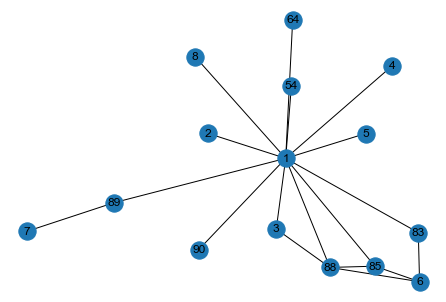

********************
Graph for phase 2


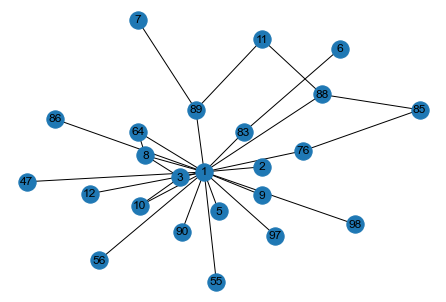

********************
Graph for phase 3


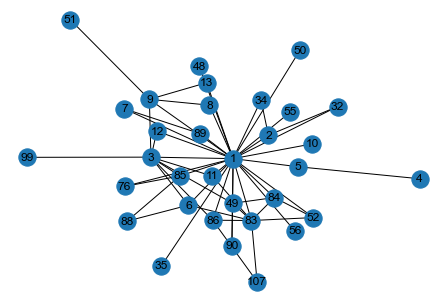

********************
Graph for phase 4


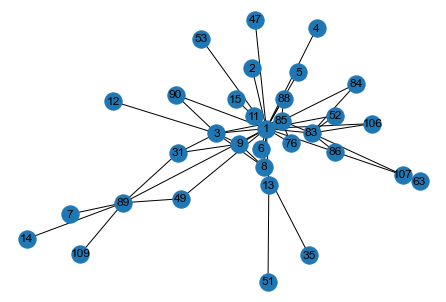

********************
Graph for phase 5


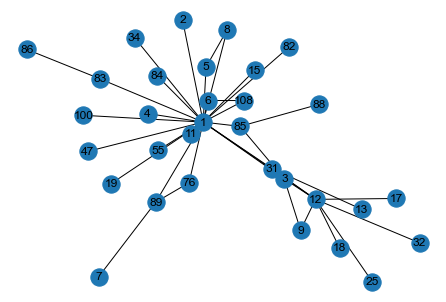

********************
Graph for phase 6


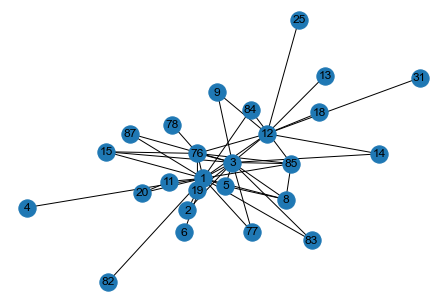

********************
Graph for phase 7


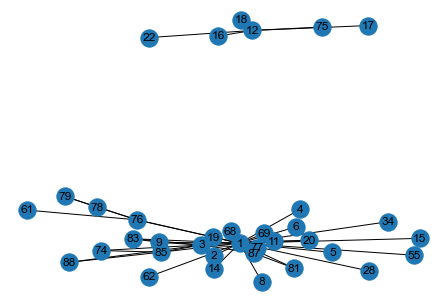

********************
Graph for phase 8


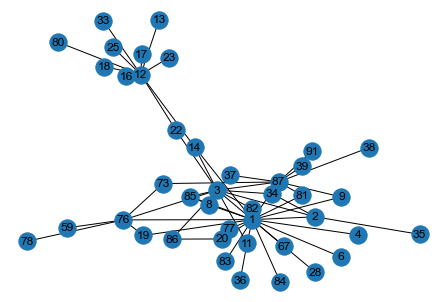

********************
Graph for phase 9


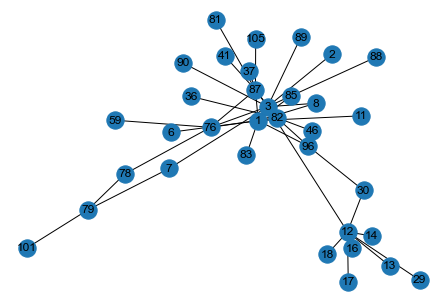

********************
Graph for phase 10


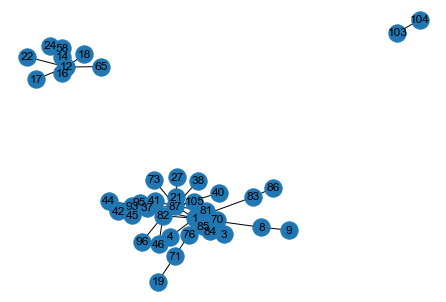

********************
Graph for phase 11


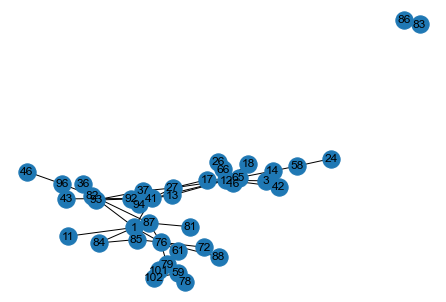

In [14]:
for i,g in enumerate(graphs):
    print("*"*20)
    print(f"Graph for phase {i + 1}")
    nx.draw(g, with_labels=True)
    plt.title(str(g))
    plt.show()

## Exploring the centrality Measures - one of our objectives

In [37]:
deg_cen = {}
for g in graphs:
    deg_cen[g] = nx.degree_centrality(g)

In [38]:
deg_cen

{<networkx.classes.graph.Graph at 0x2b656137c70>: {5: 0.07142857142857142,
  83: 0.14285714285714285,
  3: 0.14285714285714285,
  4: 0.07142857142857142,
  1: 0.8571428571428571,
  89: 0.14285714285714285,
  2: 0.07142857142857142,
  85: 0.21428571428571427,
  7: 0.07142857142857142,
  54: 0.07142857142857142,
  88: 0.2857142857142857,
  6: 0.21428571428571427,
  64: 0.07142857142857142,
  90: 0.07142857142857142,
  8: 0.07142857142857142},
 <networkx.classes.graph.Graph at 0x2b656137d90>: {3: 0.13043478260869565,
  89: 0.13043478260869565,
  1: 0.8260869565217391,
  88: 0.13043478260869565,
  5: 0.043478260869565216,
  86: 0.043478260869565216,
  8: 0.13043478260869565,
  55: 0.043478260869565216,
  90: 0.043478260869565216,
  7: 0.043478260869565216,
  10: 0.08695652173913043,
  56: 0.043478260869565216,
  97: 0.043478260869565216,
  47: 0.043478260869565216,
  98: 0.043478260869565216,
  76: 0.08695652173913043,
  83: 0.08695652173913043,
  2: 0.043478260869565216,
  9: 0.0434782608

## Computing Eigen, Betweenness, Closeness centrality measures

In [39]:
# Eigen Vector Centrality
eig_cen = {}
for g in graphs:
    eig_cen[g] = nx.eigenvector_centrality(g)

# Betweenness Centrality
betw_cen = {}
for g in graphs:
    betw_cen[g] = nx.betweenness_centrality(g)

# Closeness Centrality
close_cen = {}
for g in graphs:
    close_cen[g] = nx.closeness_centrality(g)

### Getting the TOP 5 important nodes
just sorting them will give us the major nodes.

In [40]:
def get_centrality_data(cen):
    for ix, g in enumerate(graphs):
        temp_dict = {}
        for w in sorted(cen[g], key=cen[g].get, reverse=True):
            temp_dict[w] = cen[g][w]
        print(f"Sorted importance of nodes in terms of degree centrality for phase {ix + 1} is {list(temp_dict.keys())[:5]}")
        print()

## Getting TOP 5 nodes for all the centralitis: Degree, Eigen, Betweenness and Closeness

Degree Centrality:

In [41]:
get_centrality_data(deg_cen)

Sorted importance of nodes in terms of degree centrality for phase 1 is [1, 88, 85, 6, 83]

Sorted importance of nodes in terms of degree centrality for phase 2 is [1, 3, 89, 88, 8]

Sorted importance of nodes in terms of degree centrality for phase 3 is [1, 3, 83, 9, 49]

Sorted importance of nodes in terms of degree centrality for phase 4 is [1, 83, 3, 89, 85]

Sorted importance of nodes in terms of degree centrality for phase 5 is [1, 12, 3, 31, 85]

Sorted importance of nodes in terms of degree centrality for phase 6 is [1, 3, 12, 76, 85]

Sorted importance of nodes in terms of degree centrality for phase 7 is [1, 3, 76, 12, 85]

Sorted importance of nodes in terms of degree centrality for phase 8 is [1, 3, 12, 87, 76]

Sorted importance of nodes in terms of degree centrality for phase 9 is [3, 1, 12, 87, 82]

Sorted importance of nodes in terms of degree centrality for phase 10 is [1, 87, 37, 12, 82]

Sorted importance of nodes in terms of degree centrality for phase 11 is [12, 41

Eigen Centrality:

In [42]:
get_centrality_data(eig_cen)

Sorted importance of nodes in terms of degree centrality for phase 1 is [1, 88, 85, 3, 6]

Sorted importance of nodes in terms of degree centrality for phase 2 is [1, 3, 8, 10, 64]

Sorted importance of nodes in terms of degree centrality for phase 3 is [1, 3, 83, 49, 84]

Sorted importance of nodes in terms of degree centrality for phase 4 is [1, 3, 83, 85, 9]

Sorted importance of nodes in terms of degree centrality for phase 5 is [1, 12, 3, 31, 85]

Sorted importance of nodes in terms of degree centrality for phase 6 is [1, 3, 76, 12, 85]

Sorted importance of nodes in terms of degree centrality for phase 7 is [1, 3, 19, 77, 83]

Sorted importance of nodes in terms of degree centrality for phase 8 is [1, 3, 87, 76, 8]

Sorted importance of nodes in terms of degree centrality for phase 9 is [3, 1, 87, 82, 76]

Sorted importance of nodes in terms of degree centrality for phase 10 is [1, 87, 37, 82, 81]

Sorted importance of nodes in terms of degree centrality for phase 11 is [12, 41, 

Betweenness Centrality

In [43]:
get_centrality_data(betw_cen)

Sorted importance of nodes in terms of degree centrality for phase 1 is [1, 89, 88, 83, 85]

Sorted importance of nodes in terms of degree centrality for phase 2 is [1, 89, 83, 88, 76]

Sorted importance of nodes in terms of degree centrality for phase 3 is [1, 3, 9, 5, 83]

Sorted importance of nodes in terms of degree centrality for phase 4 is [1, 89, 3, 83, 107]

Sorted importance of nodes in terms of degree centrality for phase 5 is [1, 12, 83, 85, 89]

Sorted importance of nodes in terms of degree centrality for phase 6 is [1, 12, 3, 76, 85]

Sorted importance of nodes in terms of degree centrality for phase 7 is [1, 76, 3, 85, 12]

Sorted importance of nodes in terms of degree centrality for phase 8 is [1, 12, 3, 14, 87]

Sorted importance of nodes in terms of degree centrality for phase 9 is [3, 12, 1, 87, 76]

Sorted importance of nodes in terms of degree centrality for phase 10 is [1, 87, 37, 76, 82]

Sorted importance of nodes in terms of degree centrality for phase 11 is [41

Closeness Centrality

In [44]:
get_centrality_data(close_cen)

Sorted importance of nodes in terms of degree centrality for phase 1 is [1, 88, 85, 83, 3]

Sorted importance of nodes in terms of degree centrality for phase 2 is [1, 89, 88, 3, 8]

Sorted importance of nodes in terms of degree centrality for phase 3 is [1, 3, 83, 9, 49]

Sorted importance of nodes in terms of degree centrality for phase 4 is [1, 83, 3, 89, 85]

Sorted importance of nodes in terms of degree centrality for phase 5 is [1, 12, 3, 31, 85]

Sorted importance of nodes in terms of degree centrality for phase 6 is [1, 3, 12, 76, 85]

Sorted importance of nodes in terms of degree centrality for phase 7 is [1, 3, 19, 76, 85]

Sorted importance of nodes in terms of degree centrality for phase 8 is [1, 3, 14, 87, 76]

Sorted importance of nodes in terms of degree centrality for phase 9 is [3, 1, 87, 76, 82]

Sorted importance of nodes in terms of degree centrality for phase 10 is [1, 87, 37, 82, 81]

Sorted importance of nodes in terms of degree centrality for phase 11 is [41, 1,

## Observations and Insights
### Observations
From the above data and analysis here is what we found out:
- From Degree Centrality we can see nodes 1 and 3 are featuring repeatedly in the top 5. 12 has come to top in the last phase so this person's journey in connectedness is also of interest for us.
- From Eigen centrality we see similar observations similar results and candidates of interest again are 1, 3 and 12.
- From Betweenness centrality we see same three nodes showing up repeatedly. The last phase has 41 as top betweenness centrality but features only in top 5 only in last phase. Maybe we can check about it once we have tracked the three selected.
- Closeness centrality we see same results as betweenness.

### Insights
There are three nodes we should look at and these are:
-  1: Daniel Serero (The Kingpin)
-  3: Pierre Perlini (Principle Lieutenant of Kinpin)
-  12: Ernesto Morales (Principal organizer of the cocaine import, an intermediary between the Colombians and the Serero organization.)

As we see degree centrality and Eigen centrality show similar results we can select one: here selecting degree centrality
As we see Betweenness centrality and Closeness centrality show similar results we can select one: here selecting Betweenness centrality.


## Lets Check the Journey of 1 3 and 12 using Degree and Betweenness centrality as decided above

In [62]:
def get_info_for_node(n):
    node_degree = []
    node_betweenness = []
    for ix, g in enumerate(graphs):
        if n in deg_cen[g].keys():
            node_degree.append(deg_cen[g][n]*100) # Scaling it to a larger number.
            
        else:
            node_degree.append(None)
            
        if n in betw_cen[g].keys():
            node_betweenness.append(betw_cen[g][n]*100)
        else:
            node_betweenness.append(None)
        
    return node_degree, node_betweenness

### Getting information for plotting the journey
NOTE: we might not have a few nodes in all the phases.

In [63]:
# node 1 degree and betweenness centrality
node1_deg, node1_bet = get_info_for_node(1)
# node 3 degree and betweenness centrality
node3_deg, node3_bet = get_info_for_node(3)
# node 12 degree and betweenness centrality
node12_deg, node12_bet = get_info_for_node(12)
phase_numbers = []
for ix in range(1, len(graphs) + 1):
    phase_numbers.append(ix)
print(phase_numbers)
print(node1_deg)
print(node3_deg)
print(node12_deg)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[85.71428571428571, 82.6086956521739, 84.375, 71.875, 70.96774193548387, 72.0, 68.57142857142857, 48.78048780487805, 30.303030303030305, 31.70731707317073, 17.5]
[14.285714285714285, 13.043478260869565, 28.125, 21.875, 16.129032258064516, 56.00000000000001, 28.57142857142857, 31.70731707317073, 33.333333333333336, 2.4390243902439024, 2.5]
[None, 4.3478260869565215, 6.25, 3.125, 25.806451612903224, 36.0, 14.285714285714285, 24.390243902439025, 24.242424242424242, 17.073170731707318, 30.000000000000004]


### Plotting the data

Degree Centrality Variation of Node 1 3 and 12 across 11 phases


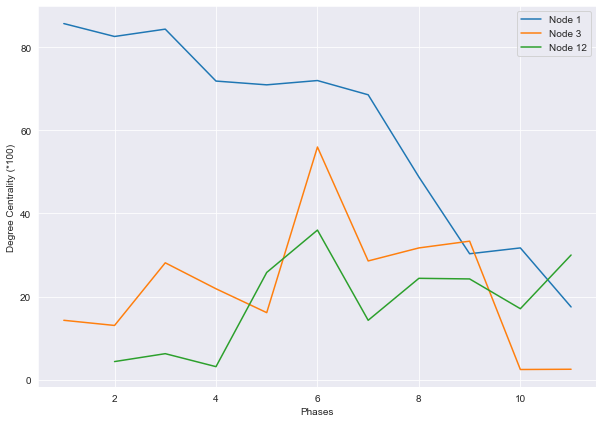

In [64]:
plt.figure(figsize=(10, 7))
plt.plot(phase_numbers, node1_deg, label="Node 1")
plt.plot(phase_numbers, node3_deg, label="Node 3")
plt.plot(phase_numbers, node12_deg, label="Node 12")

plt.ylabel("Degree Centrality (*100)")
plt.xlabel("Phases")
plt.legend()  # This shows the color legend for each node.
print("Degree Centrality Variation of Node 1 3 and 12 across 11 phases")
plt.show()

Betweenness Centrality of Nodes 1, 3 and 12 across 11 phases


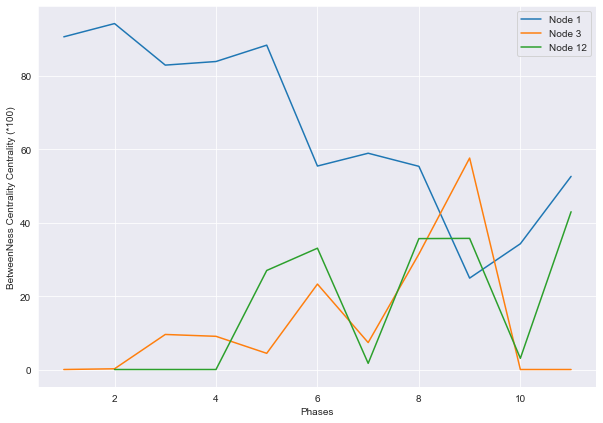

In [65]:
plt.figure(figsize=(10, 7))
plt.plot(phase_numbers, node1_bet, label="Node 1")
plt.plot(phase_numbers, node3_bet, label="Node 3")
plt.plot(phase_numbers, node12_bet, label="Node 12")

plt.ylabel("BetweenNess Centrality Centrality (*100)")
plt.xlabel("Phases")
plt.legend()  # This shows the color legend for each node.
print("Betweenness Centrality of Nodes 1, 3 and 12 across 11 phases")
plt.show()

## Insights
- As the degree of centrality and degree of betweeenness of Node 1 our kingpin decreased Node 3 (the Lieutenant) rose up. This signified that as police were concentrating on the Kingpin, he delegated parts of his tasks to liutenant and started to lie low.
- Another important insight is as the context suggests, slowly the flow has shifted towards Cocain smuggling from Columbia and the principle guy rose to power and started to become the hub for interactions.
- As we approach the end of year 2, we see, even the lieutenant started to decrease his connectedness and started lying low.

#### To disrupt this chain, Along with 1 and 3 who are the principals from starting, the rising start the Cocain Import Organizer should be targeted and arrested.

## Highlighting the important Nodes 1, 3 and 12 in all the phases for visual representation

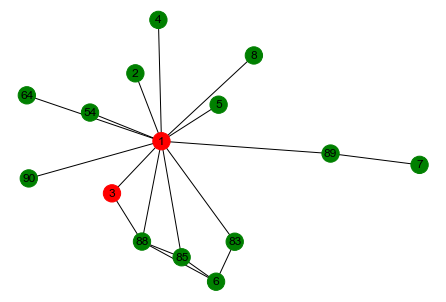

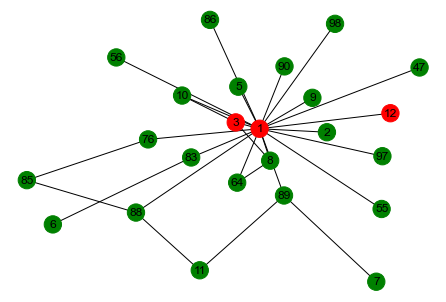

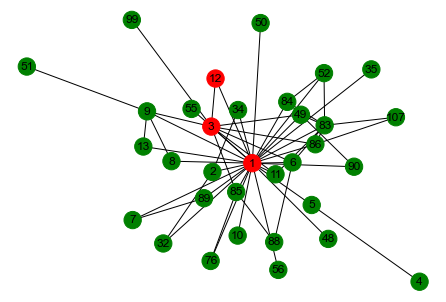

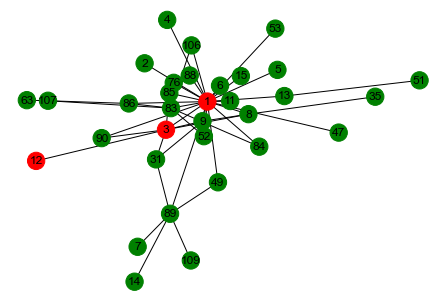

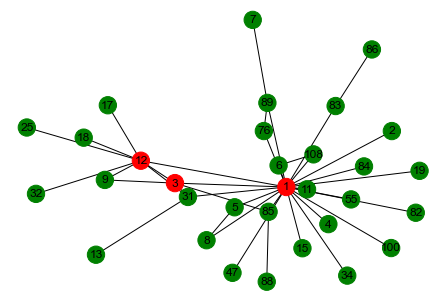

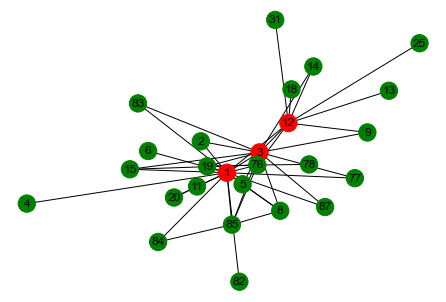

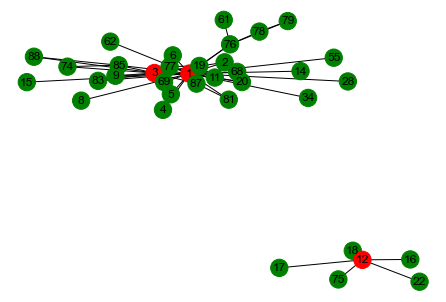

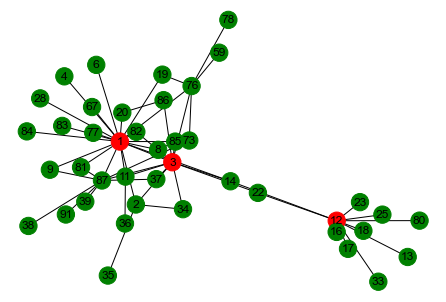

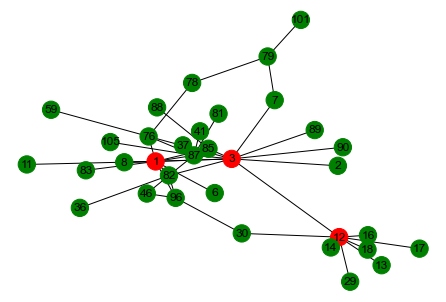

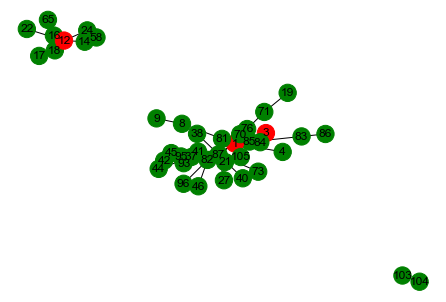

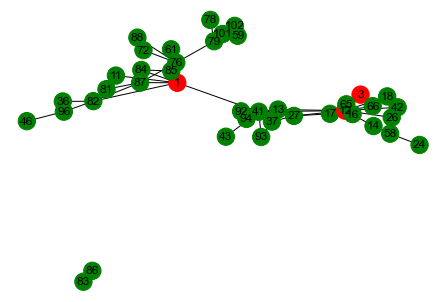

In [80]:
graph2 = nx.from_pandas_adjacency(p2)
color = []
for g in graphs:
    color = []
    for node in g:
        if (node == 1 or node == 3 or node == 12):
            color.append("red")
        else:
            color.append("green")
    nx.draw_spring(g,node_color=color,with_labels=True)
    plt.title(str(g))
    plt.show()
